In [1]:
from tree import *
from base_tree import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot(title, y, y1=None, x=None, label1=None, label2=None, xlabel=None, ylabel=None):
    if x is None:
        x = [i for i in range(len(y))]
        
    fig = plt.figure()
    plt.figure(figsize=(16,6), dpi= 80)
    plt.title(title, fontsize=17)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)
    plt.grid(axis='both', alpha=.3)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.plot(x, y, color='tab:red',label=label1);
    if y1 is not None:
        plt.plot(x, y1, color='tab:purple',label=label2)
    plt.legend()
    plt.show();

In [47]:
n_data = 300
X = np.linspace(-1, 4, n_data).reshape(-1, 1)
y = X[:, 0] ** 2 -  X[:, 0] + np.random.rand(n_data) + np.cos(X[:, 0])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
forest = RandomForestRegressor(10, min_samples_leaf=10)
forest.fit(X_train, y_train)
mae(y_test, forest.predict(X_test))

0.3761248914200122

In [51]:
mu = y_train.mean() 
sd_prior = y_train.std()
prior_obs = 2
kappa = prior_obs
alpha = prior_obs/2
var_prior = sd_prior**2
tau_prior = 1/var_prior
beta = alpha/tau_prior
mu
partition = (1, 0.00100)
prior = [mu, kappa, alpha, beta]
b_tree = BayesianDecisionTree(partition_prior=partition,prior=prior)
b_tree.fit(X_train, y_train)
print(mae(y_test, b_tree.predict(X_test)))
len(np.unique(b_tree.predict(X_test))), len(X_test)

0.40672765449241743


(12, 75)

In [52]:
tree = DecisionTreeRegressor(min_samples_leaf=20)
tree.fit(X_train, y_train)
print(mae(y_test, tree.predict(X_test)))
len(np.unique(tree.predict(X_test))), len(X_test)

0.5048340076671964


(9, 75)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

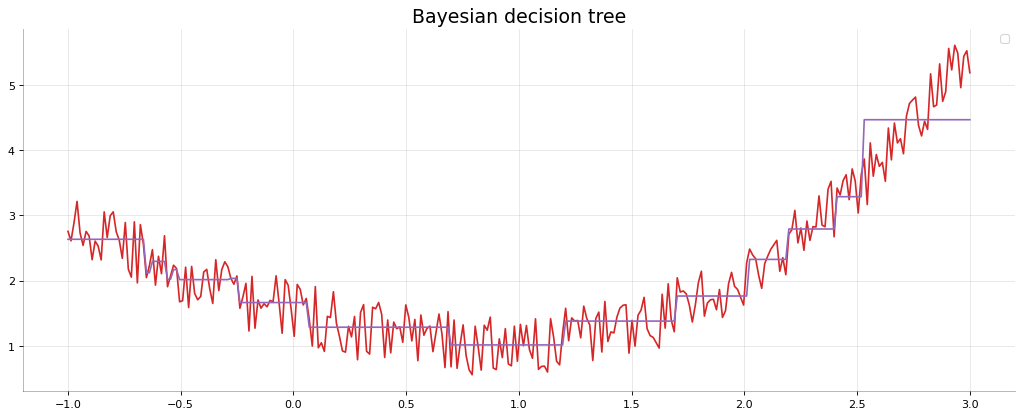

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

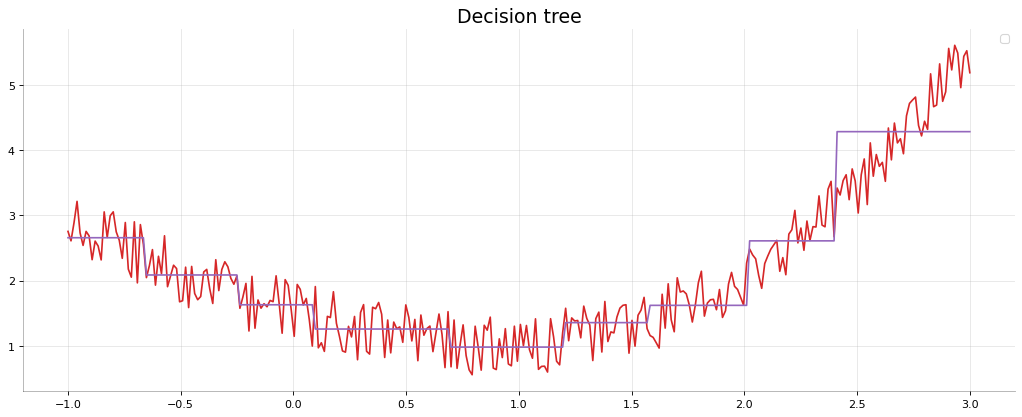

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

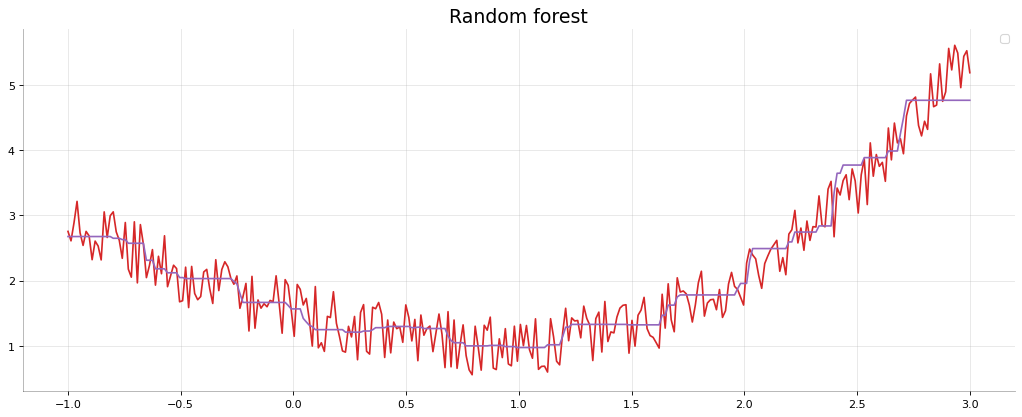

In [46]:
plot("Bayesian decision tree", y, x=X[:, 0], y1=b_tree.predict(X))
plot("Decision tree", y, x=X[:, 0], y1=tree.predict(X))
plot("Random forest", y, x=X[:, 0], y1=forest.predict(X))
